In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>


<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html).

> **Acknowledgement:** This notebook was constructed using JupyterHub service from [syzygy.ca](http://syzygy.ca) with assistance from [Ian Allison](https://github.com/ianabc) and India Heisz. -- [James Colliander](http://colliand.com)

## Load the data from AWS S3 into Jupyter

This process is loading NSERC Awards data starting with 1995 and moving to 2016...

In [ ]:
## Thanks Ian Allison.
## Install some python libraries
import numpy as np
import pandas as pd
import sys

## Build a data frame with NSERC Awards Data by iteratively reading CSV files hosted on AWS S3.
## It would improve reproducibility if we imported from a definitive NSERC Awards Data.
df = pd.DataFrame()

startYear = 1995
endYear   = 2019  # The last year is not included, so 2017 means we include the 2016 collection but not 2017.

## some columns dropped here for convenience
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 

## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


In [3]:
## via India Heisz
## Define some methods
## Plotly is not installed by default
## TODO Remove plotly dependence or arrange for plotly installed as default on the hub
import matplotlib.ticker as mtick
# import plotly.graph_objs as go
# import plotly.offline as py
#  from plotly.offline import init_notebook_mode, iplot
# import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def nsercPlot (data):
    fig, axes = plt.subplots()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    y = data.groupby(xAxis).sum()[yAxis]
    x = y.index
    
    plt.xlabel(xAxis, fontsize=14)
    plt.ylabel(yAxis, fontsize=14)
    plt.title(title)
      
    plt.plot(x,y)
    
    init_notebook_mode(connected=True)
    
    axes.scatter(x,y,s=plotPointSizes,alpha=opacity)
    canvas = FigureCanvas(fig)
    plotly_fig = tls.mpl_to_plotly(fig)
    py.iplot(plotly_fig)
    
    return;

def viewAvailableSearch(column, searchString):
    available = df.drop_duplicates(subset = column)
    available = available[available[column].str.contains(searchString, na=False)]
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

def overview(column, data):
    mean = data[columnYouWantInformationOn].mean()
    print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

    median = data[columnYouWantInformationOn].median()
    print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

    standardDeviation = data[columnYouWantInformationOn].std()
    print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

    awardCount = data.AwardAmount.count()
    print('The total number of awards for your selection is ' + str(awardCount))
    return;

Matplotlib is building the font cache using fc-list. This may take a moment.


## First Look at the Data

An exploration of the table.

In [4]:
df
## Display the dataframe on the screen as a table. 

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,18,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,16,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,147,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,146,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,146,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,146,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,24,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,6,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,8,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,7,Software and development


### Number of rows in Awards Data Frame

In [5]:
## Number of rows representing all award reports from NSERC during 1995-2016
len(df)

457896

### Columns of Data Frame

In [6]:
df.columns

Index(['Name', 'Department', 'OrganizationID', 'Institution', 'ProvinceEN',
       'CountryEN', 'FiscalYear', 'AwardAmount', 'ProgramID', 'ProgramNameEN',
       'Committee', 'ResearchSubjectEN'],
      dtype='object')

Money flowed out of NSERC? We have a data set that reports NSERC disbursements with data to answer:
> When? Who received it? Which university? Province? How much? Which NSERC program?

## Values in Columns

In [7]:
df['Department'].unique()

array(['Biology', 'Mathematical Sciences', 'Biological Sciences', ...,
       'Physiology and Pathophysiology - Physiology and Pathophysiology',
       'NanoEngineering',
       'Science and Technology, School of - Science and Technology, School of'],
      dtype=object)

### Number of unique departments

In [8]:
## Number of unique departments
len(df['Department'].unique())

5716

In [9]:
df['ProvinceEN'].unique()

array(['Ontario', 'Alberta', 'Québec', 'Manitoba', 'Minnesota',
       'Nova Scotia', 'Newfoundland and Labrador', 'New Brunswick',
       'Saskatchewan', 'British Columbia', nan, 'Rhode Island',
       'North Carolina', 'California', 'Michigan', 'New York', 'Indiana',
       'New Mexico', 'Massachusetts', 'Vermont', 'Prince Edward Island',
       'Colorado', 'Washington', 'Arizona', 'Utah', 'New Jersey',
       'Maryland', 'Illinois', 'Tennessee', 'Texas', 'Oregon',
       'Connecticut', 'Delaware', 'South Carolina', 'Missouri',
       'Virginia', 'Pennsylvania', 'Iowa', 'Florida', 'Wisconsin',
       'Georgia', 'Alabama', 'District of Columbia', 'Ohio', 'Kansas',
       'New Hampshire', 'Kentucky', 'Oklahoma', 'Hawaii', 'Arkansas',
       'Yukon', 'Alaska', 'Montana', 'Louisiana', 'Maine', 'Nunavut',
       'Nevada', 'Idaho', 'Northwest Territories', 'Nebraska',
       'Mississippi', 'Yukon Territory'], dtype=object)

In [10]:
# How many unique ProgramID values?
len(df['ProgramID'].unique())

204

In [11]:
## Mismatch in program labels?
## TODO: Match ProgramNameEN to ProgramID; Find outliers
len(df['ProgramNameEN'].unique())

207

### Programs by AwardAmount

In [12]:
## Identify programs that have received the most funding
pd.pivot_table(df, index=['ProgramNameEN','FiscalYear'], aggfunc=sum,
               values = ['AwardAmount']
              ).sort_values(by=['AwardAmount'], ascending=False)

AwardAmount
ProgramNameEN                                      FiscalYear             
Discovery Grants Program - Individual              2016          328120835
                                                   2014          318531751
                                                   2015          318145584
                                                   2013          315708147
                                                   2012          314440589
                                                   2011          310896274
                                                   2009          309730991
                                                   2010          307161877
                                                   2008          304466356
                                                   2007          302156326
                                                   2006          299149016
                                                   2005          290622553
                                                   2004          266599163
                                                   2003          263856474
                                                   2002          250797723
                                                   2000          236741847
                                                   2001          231280130
                                                   1999          220248666
                                                   1998          207955469
                                                   1997          187432848
                                                   1996          184133630
                                                   1995          181612886
Canada Research Chairs                             2008          118014545
                                                   2009          117630000
                                                   2010          117343069
                                                   2011          117176009
                                                   2007          115887247
                                                   2012          115431694
                                                   2013          113820345
                                                   2014          112978091
...                                                                    ...
Michael Smith Award for Science Promotion - Ind... 2001              10000
Industrial Research Fellowships                    2014              10000
Michael Smith Award for Science Promotion - Ind... 2003              10000
Doctoral Prizes                                    2015              10000
Undergraduate Student Research Awards Program -... 2014               9000
Regional Office Discretionary Funds - Prairie      2010               9000
Aboriginal Ambassadors in the Natural Sciences ... 2011               8905
                                                   2015               8674
Postgraduate Scholarships - Master's               2015               8650
Banting Postdoctoral Fellowships                   2014               8415
JSPS Researcher Exchange Program               ... 2009               8000
University Research Fellowships (H)                1996               7625
1967 Science and Engineering Scholarships          2001               7127
Canada International Fellowships (H)               1997               6797
Students Promoting Awareness of Research Knowledge 2005               5000
Michael Smith Award for Science Promotion - Ind... 2005               5000
                                                   2006               5000
                                                   2007               5000
                                                   2008               5000
Undergraduate Student Research Awards Program -... 2015               4500
Aboriginal Ambassadors in the Natural Sciences ... 2010               4469
Postgraduate 

In [13]:
## Identify programs that have received the most funding
pd.pivot_table(df, index=['FiscalYear', 'ProgramNameEN'], aggfunc=sum,
               values = ['AwardAmount']
              ).sort_values(by=['AwardAmount'], ascending=False)

,,AwardAmount
FiscalYear,ProgramNameEN,
2016,Discovery Grants Program - Individual,328120835
2014,Discovery Grants Program - Individual,318531751
2015,Discovery Grants Program - Individual,318145584
2013,Discovery Grants Program - Individual,315708147
2012,Discovery Grants Program - Individual,314440589
2011,Discovery Grants Program - Individual,310896274
2009,Discovery Grants Program - Individual,309730991
2010,Discovery Grants Program - Individual,307161877
2008,Discovery Grants Program - Individual,304466356


In [14]:
programYear = pd.pivot_table(df, index=['ProgramNameEN','FiscalYear'], aggfunc=sum,
               values = ['AwardAmount']
              ).sort_values(by=['AwardAmount'], ascending=False)

In [15]:
## Export this table as a CSV file.
programYear.to_csv('program-year.csv')

## Big Winners

In [16]:
## Historical Program recipents of most NSERC funds: 1995 -- 2016
df.groupby(['ProgramNameEN']).sum()['AwardAmount'].sort_values(ascending=False).head(n=50)

ProgramNameEN
Discovery Grants Program - Individual                                                                   5949789135
Canada Research Chairs                                                                                  1590512911
Collaborative Research and Development Grants                                                            948122955
Strategic Projects - Group                                                                               908959760
Networks of Centres of Excellence                                                                        762559105
Research Tools and Instruments - Category 1 (<$150,000)                                                  565583275
Postgraduate Scholarships                                                                                435601321
Industrial Research Chairs                                                                               398835692
Research Networks                                                 

In [17]:
## Historical PI recipents of most NSERC funds: 1995 -- 2016
df.groupby(['Name']).sum()['AwardAmount'].sort_values(ascending=False).head(n=50)

Name
Hormes, Josef           99836800
Gupta, Arvind           97587570
McWalter, Ian           75503588
Fortier, Louis          72542772
Frise, Peter            63874923
Barge, Brian            50400000
Thomlinson, William     46610800
Fedosejevs, Robert      40720798
McDonald, Arthur        36781300
Orr, Robert             32043881
Smith, Donald           31227906
Mufti, Aftab            28761712
Wallace, Douglas        28433833
Servos, Mark            28130452
Rogers, Harry           27590000
Salama, Andre           26296562
Burton, Howard          25000000
Yada, Rickey            24982617
Clowes, Ronald          24072844
Pelton, Robert          23985763
Svensson, Carl          22782441
Lamb, Robert            21349800
Chrisman, Nicholas      21286250
Larter, Stephen         20024564
Bourbonnais, Normand    17753965
Eyton, Anthony          17575000
Booth, Kellogg          16879011
McPherson, Robert       16858697
Plant, David            16346618
Emadi, Ali              16107231
Withe

## Discovery and Not Discovery Budgets

### Total Budget

Text(0, 0.5, 'Reported Dollars')

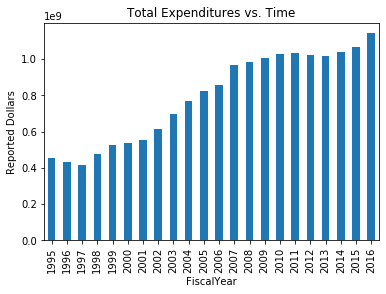

In [18]:
ax = (df.groupby(['FiscalYear']).sum()['AwardAmount'].plot(kind="bar", title="Total Expenditures vs. Time"))
ax.set_ylabel("Reported Dollars")

In [19]:
## Total Annual Budget
df.groupby(['FiscalYear']).sum()['AwardAmount']

FiscalYear
1995     451159747
1996     434116337
1997     417146970
1998     477141539
1999     526133116
2000     537934451
2001     554698568
2002     615320903
2003     696997644
2004     765643760
2005     820640167
2006     854567999
2007     968713281
2008     980889930
2009    1003483757
2010    1026366682
2011    1035205511
2012    1021894152
2013    1018139165
2014    1038149414
2015    1068044894
2016    1142066427
Name: AwardAmount, dtype: int64

### Not Discovery

Text(0, 0.5, 'Reported Dollars')

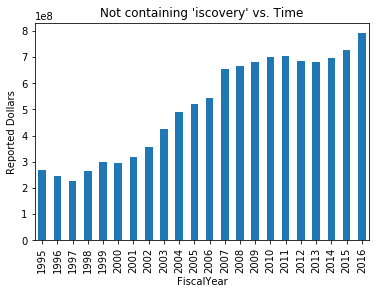

In [20]:
## The ~ operator negates the condition.
ax = (df.loc[~(df['ProgramNameEN'].str.contains('iscovery'))].groupby(['FiscalYear']).sum()['AwardAmount'].plot(kind="bar", title="Not containing 'iscovery' vs. Time"))
ax.set_ylabel("Reported Dollars")

In [21]:
df.loc[~(df['ProgramNameEN'].str.contains('iscovery'))].groupby(['FiscalYear']).sum()['AwardAmount']

FiscalYear
1995    267113329
1996    247533171
1997    227810152
1998    266731883
1999    299956302
2000    294508093
2001    316537927
2002    357333281
2003    423803197
2004    488699482
2005    519567082
2006    545233090
2007    655321429
2008    664642572
2009    680426976
2010    702101715
2011    705872398
2012    685991741
2013    681486392
2014    698064881
2015    727279990
2016    791496311
Name: AwardAmount, dtype: int64

### Discovery

Text(0, 0.5, 'Reported Dollars')

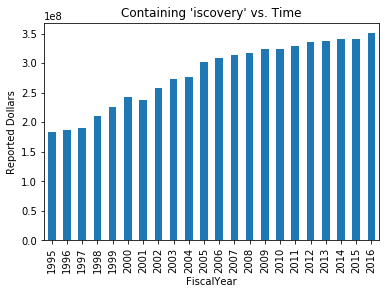

In [22]:

ax = (df.loc[(df['ProgramNameEN'].str.contains('iscovery'))].groupby(['FiscalYear']).sum()['AwardAmount']
      .plot(kind="bar", title="Containing 'iscovery' vs. Time"))
ax.set_ylabel("Reported Dollars")

In [23]:
df.loc[(df['ProgramNameEN'].str.contains('iscovery'))].groupby(['FiscalYear']).sum()['AwardAmount']

FiscalYear
1995    184046418
1996    186583166
1997    189336818
1998    210409656
1999    226176814
2000    243426358
2001    238160641
2002    257987622
2003    273194447
2004    276944278
2005    301073085
2006    309334909
2007    313391852
2008    316247358
2009    323056781
2010    324264967
2011    329333113
2012    335902411
2013    336652773
2014    340084533
2015    340764904
2016    350570116
Name: AwardAmount, dtype: int64

In [24]:
disc = df.loc[(df['ProgramNameEN'].str.contains('iscovery'))]

In [25]:
disc['ProgramNameEN'].unique()

array(['Discovery Grants Program - Individual',
       'Discovery Grants Program - Group',
       'Discovery Grants Program - Project',
       'Discovery Grants Program - Institutes and Initiatives',
       'Discovery Grants Program - Multidisciplinary Network Groups',
       'Discovery Grants Program - Ship Time',
       'Discovery Grants Program - Accelerator Grant',
       'Discovery Grants Program - Leadership Support',
       'Discovery Grants Program - Northern Research Supplement',
       'Discovery Grants Program - Accelerator Supplements',
       'Discovery Frontiers - Northern Earth System Research',
       'Discovery Frontiers - Advancing Big Data Science in Genomics Research                               ',
       'Discovery Frontiers - Digging into Data                                                             ',
       'Discovery Development Grant',
       'Discovery Frontiers - New Materials for Clean Energy and Energy Efficiency'],
      dtype=object)

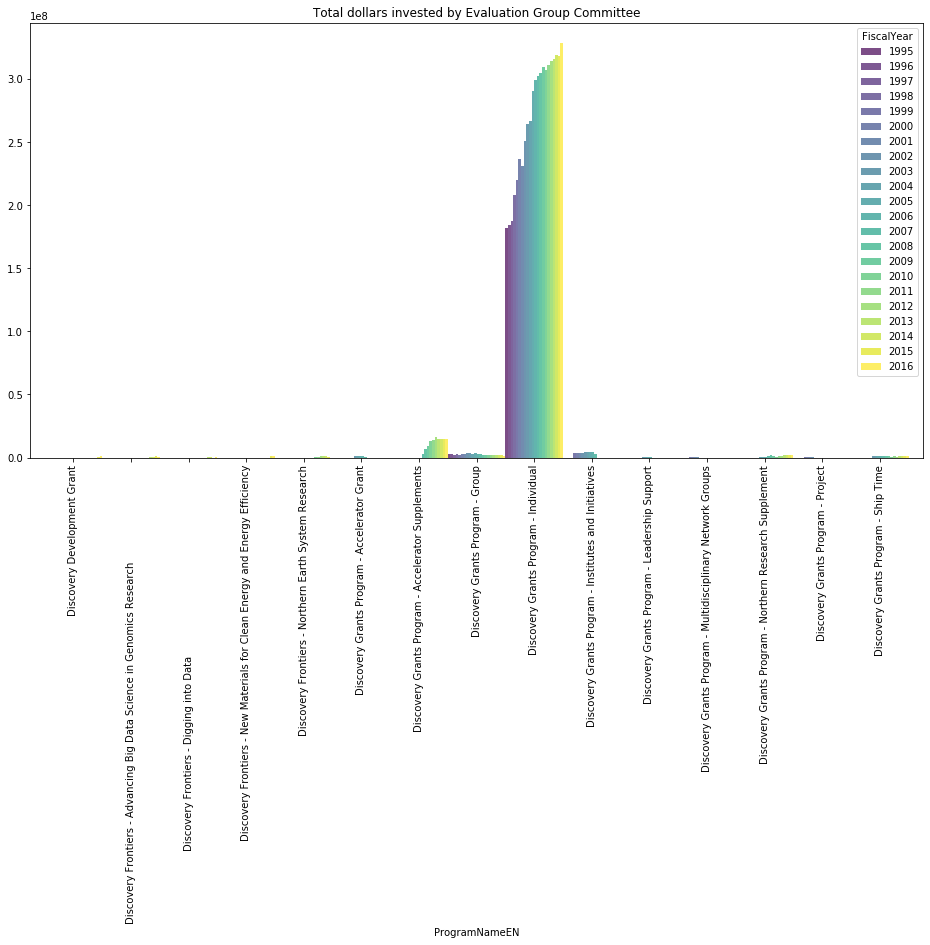

In [26]:
## Distribution of Discovery Funding Across Programs
(disc.groupby(['ProgramNameEN','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Total dollars invested by Evaluation Group Committee")

The bulk of the historical expenses in Discovyer took place in "Discovery Grants Program - Individual"

### Not Discovery

In [27]:
notdisc = df.loc[~(df['ProgramNameEN'].str.contains('iscovery'))]

In [28]:
notdisc['ProgramNameEN'].unique()

array(['Postgraduate Scholarships',
       'Industrial Undergraduate Student Research Awards',
       'Postdoctoral Fellowships', 'Industrial Postgraduate Scholarships',
       '1967 Science and Engineering Scholarships',
       'University Undergraduate Student Research Awards',
       'Collaborative Research and Development Grants',
       'Canada International Fellowships (H)',
       'Infrastructure Grants (H)', 'Strategic Projects - Group',
       'Research Tools and Instruments - Category 1 (<$150,000)',
       "Women's Faculty Awards - Salary (H)",
       "Women's Faculty Awards (H)",
       'Industrially Oriented Research Grants',
       'International: North American Research Fellowships',
       'International : Workshops', 'Networks of Centres of Excellence',
       'Industrial Research Chairs', 'Miscellaneous Grants',
       'Conference Grants (H)', 'Strategic Grants - Individual (H)',
       'Workshops and Seminars (H)', 'Collaborative Project Grants (H)',
       'Industri

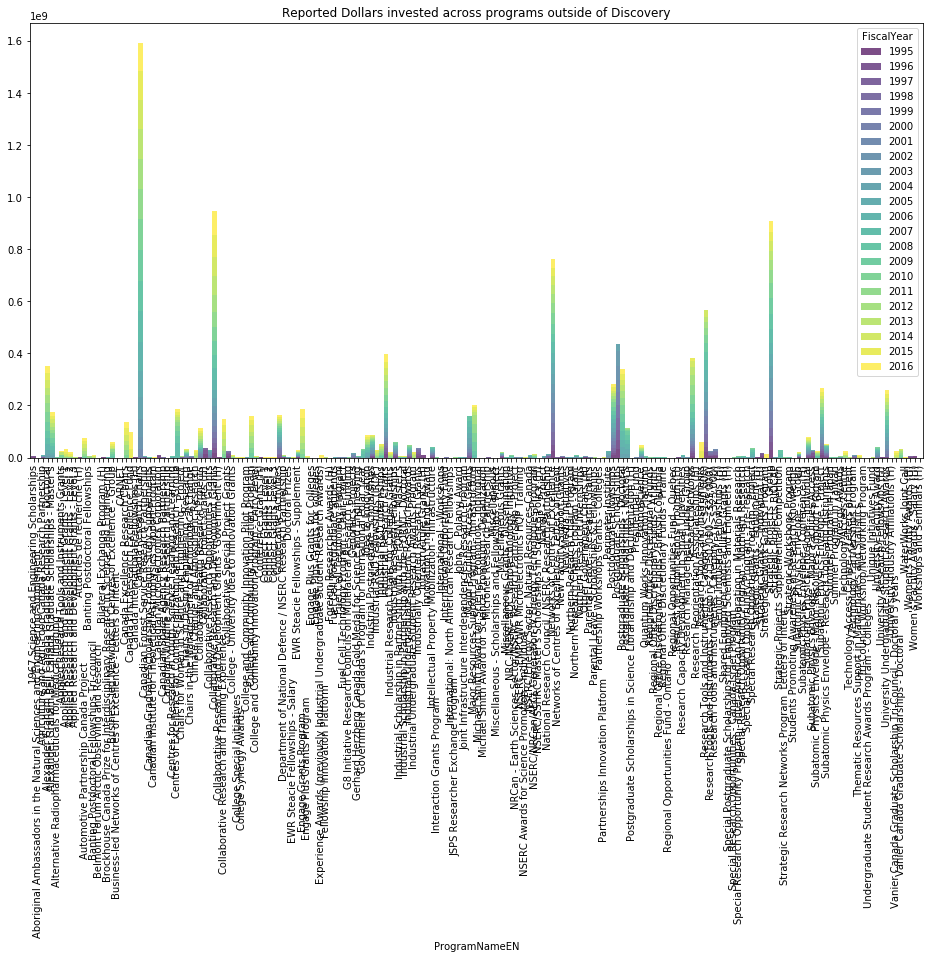

In [29]:
## Distribution of Discovery Funding Across Programs
(notdisc.groupby(['ProgramNameEN','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Reported Dollars invested across programs outside of Discovery")

## Evaluation Group (EG) Committees

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

Text(0, 0.5, 'Reported Dollars')

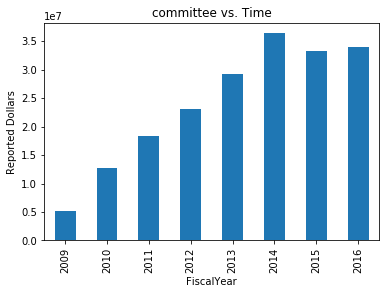

In [30]:
committee = 1504
ax = df.loc[df['Committee'] == committee].groupby(['FiscalYear']).sum()['AwardAmount'].plot(
    kind="bar", title="committee vs. Time")
ax.set_ylabel("Reported Dollars")

In [31]:
EvaluationGroups = df.loc[(df['Committee']==1501) 
                                   | (df['Committee']==1502)
                                   | (df['Committee']==1503)
                                   | (df['Committee']==1504) 
                                   | (df['Committee']==1505)
                                   | (df['Committee']==1506)
                                   | (df['Committee']==1507)
                                   | (df['Committee']==1508)
                                   | (df['Committee']==1509)
                                   | (df['Committee']==1510)
                                   | (df['Committee']==1511)
                                   | (df['Committee']==1512)]

In [32]:
## 2009 is an outlier so drop it. 2010 is also a bit weird.
EG = EvaluationGroups.loc[~(EvaluationGroups['FiscalYear']==2009)]

In [33]:
EG['FiscalYear'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

## Total Reported Dollars vs Fiscal Year separated by EG Committee

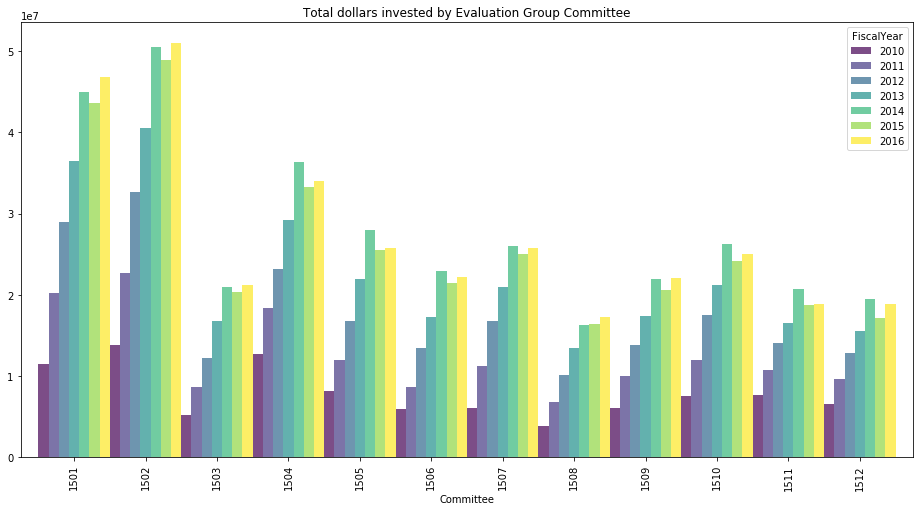

In [34]:
## Total investment dollars vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Total dollars invested by Evaluation Group Committee")

Discipline Dynamics? The number and age of PIs served by each committee and each fiscal year changes.

## Number of Awards vs Fiscal Year separated by EG Committee

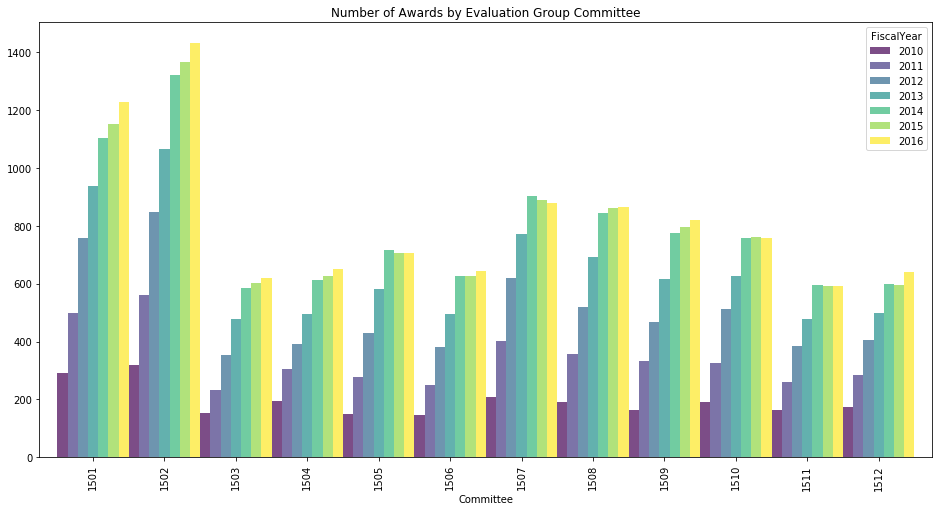

In [35]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Number of Awards by Evaluation Group Committee")

Calculuate an average? Divide the total dollars spent on a committee during a fiscal year 
by the number of awards given in that committee during that fiscal year.

## Average Award Size vs. Fiscal Year separated by EG Committee

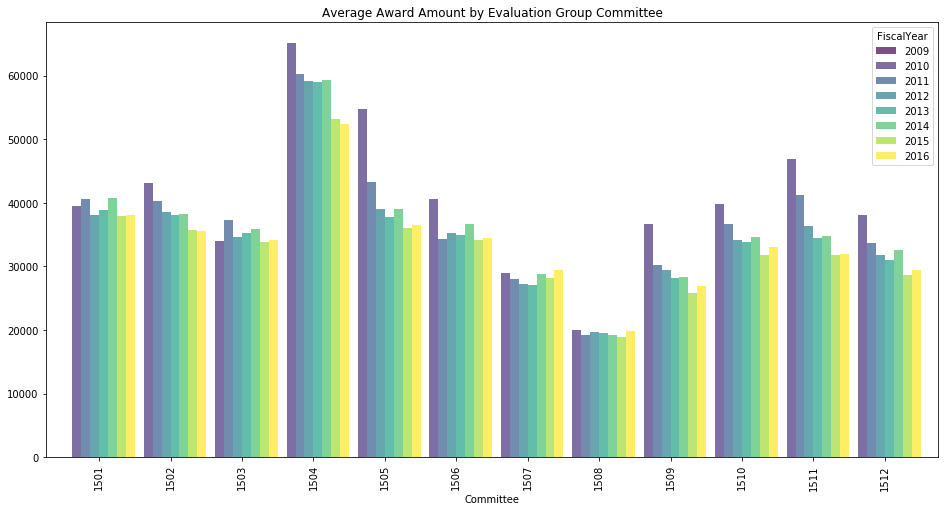

In [36]:
## Total Dollars invested divided by number of awards vs. Fiscal Year separated by Evaluation Group Committee
((EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'])/(EvaluationGroups.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'])).unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Average Award Amount by Evaluation Group Committee")

### Calculate using .mean()

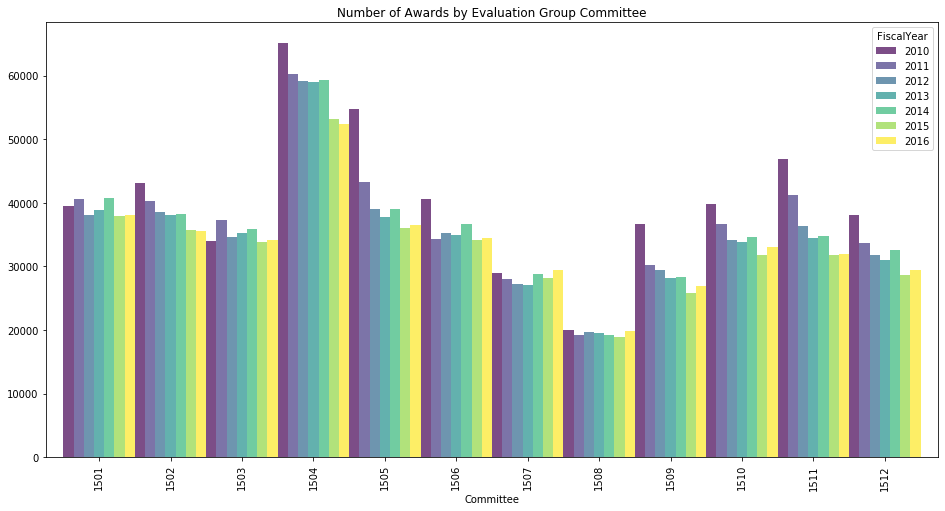

In [37]:
## Mean vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).mean()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Number of Awards by Evaluation Group Committee")

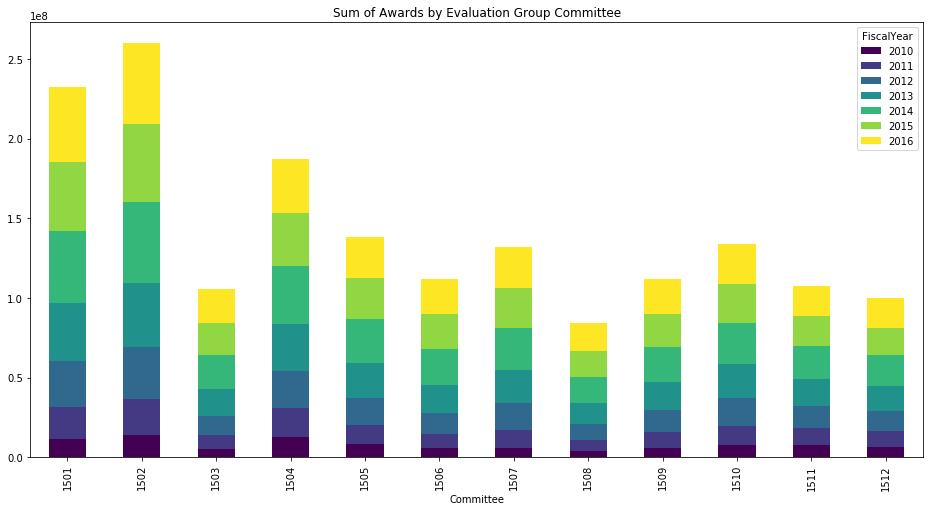

In [38]:
## (Stacked) Sum vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", figsize=(16, 8), 
    title="Sum of Awards by Evaluation Group Committee")

## Explore Funding of Major Programs by Institution

## Canada Research Chairs

In [39]:
crc = df.loc[df['ProgramNameEN']=='Canada Research Chairs']

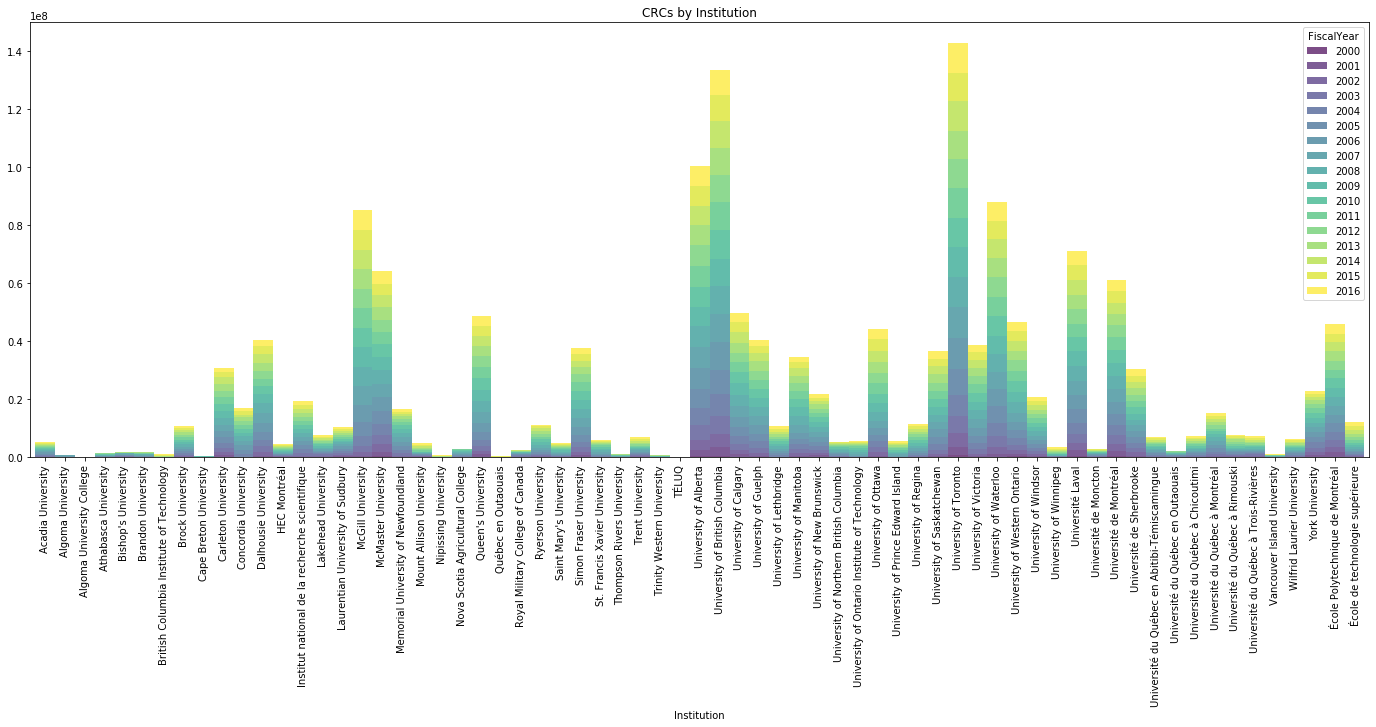

In [40]:
## CRCs by Instititution
(crc.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1, title="CRCs by Institution")

## CRD

In [41]:
crd = df.loc[df['ProgramNameEN'] == 'Collaborative Research and Development Grants']

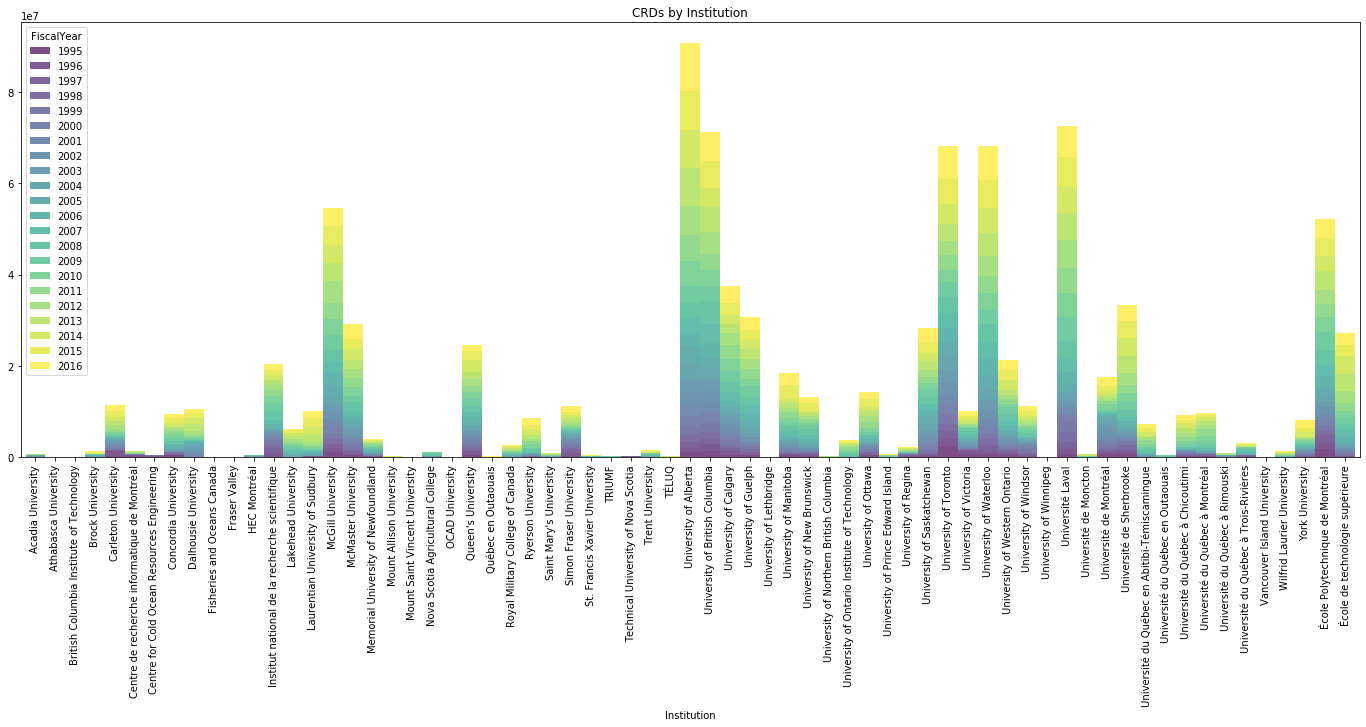

In [42]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(crd.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1, title = "CRDs by Institution")

## Strategic Projects

In [43]:
strat = df.loc[df['ProgramNameEN'] == 'Strategic Projects - Group']

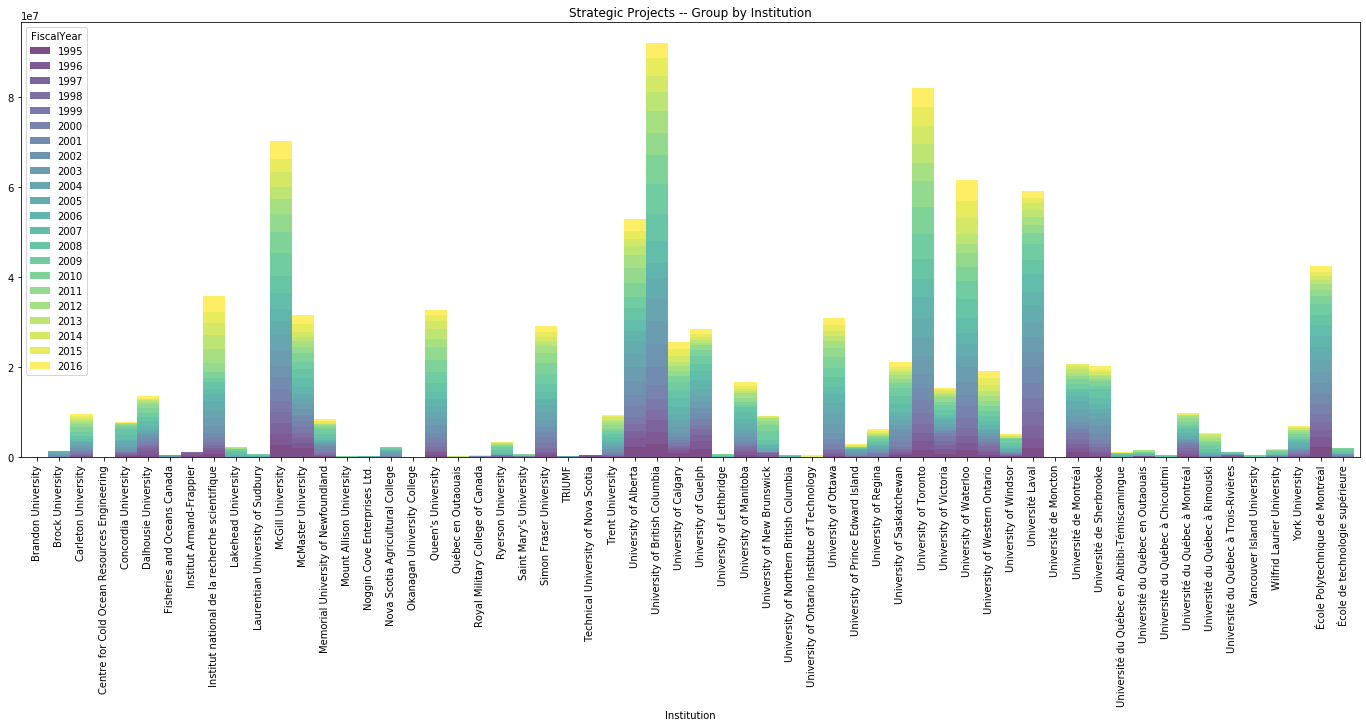

In [44]:
## Strategic Project Awards vs Fiscal Year separated by Institution
(strat.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1, 
    title="Strategic Projects -- Group by Institution")

## Discovery Grants - Individual

In [45]:
discov = df.loc[df['ProgramNameEN'] == 'Discovery Grants Program - Individual']

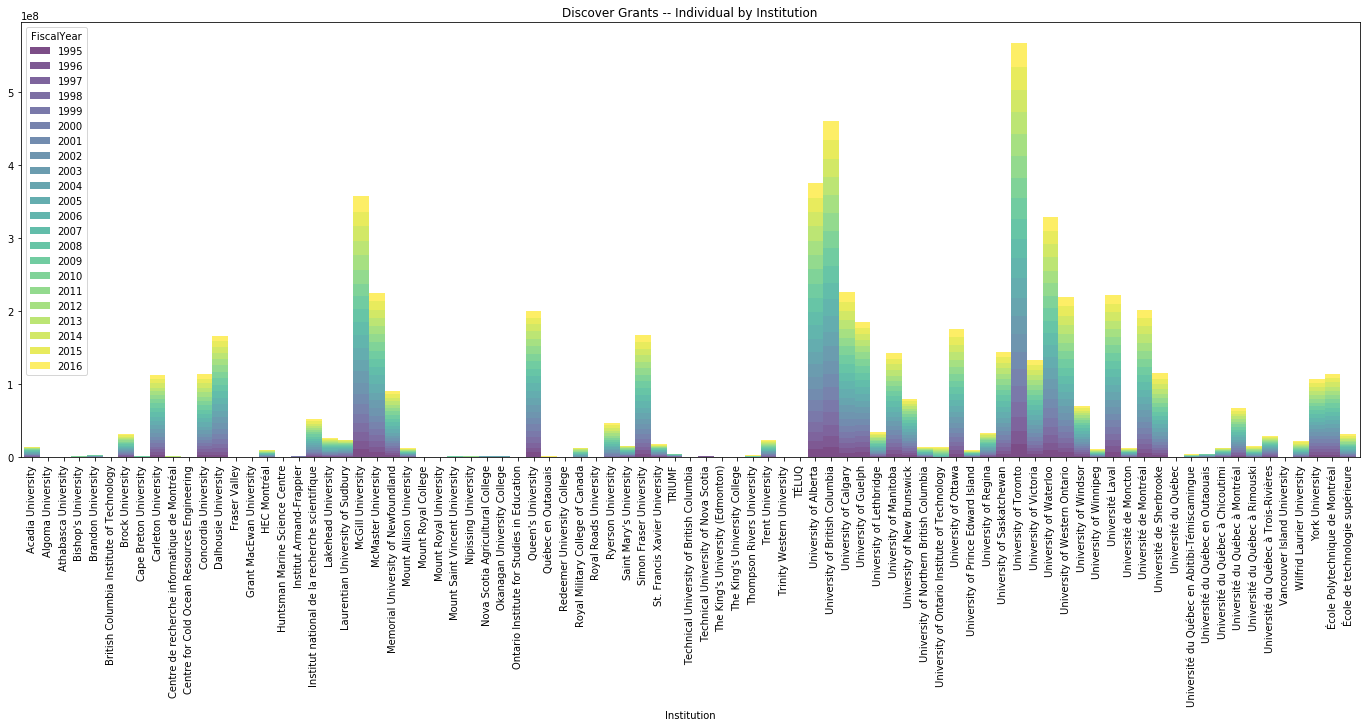

In [46]:
## Strategic Project Awards vs Fiscal Year separated by Institution
(discov.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1,
    title="Discover Grants -- Individual by Institution")